# Extract

A Convolutional Network is used to extract relevant features from the images.

# Setup

Check if extraction done

In [ ]:
assert not Path(DIR_DATA / 'COCO/train/features.pt').exists(), 'Extraction done already. Move on!'

## Imports

In [11]:
from captioner.extract import get_dataloaders, extract, Extractor
from captioner.utils import show_coco
from captioner.hparams import image_shape, architecture
from captioner.hparams import extractor_batch_size as batch_size

## Preparations

In [2]:
jtplot_style()

In [3]:
DIR_DATA = DIR_DATA / 'COCO'

## Load Data

In [4]:
dataloader = get_dataloaders(DIR_DATA, image_shape, batch_size)

loading annotations into memory...
Done (t=1.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


Take a look at the images

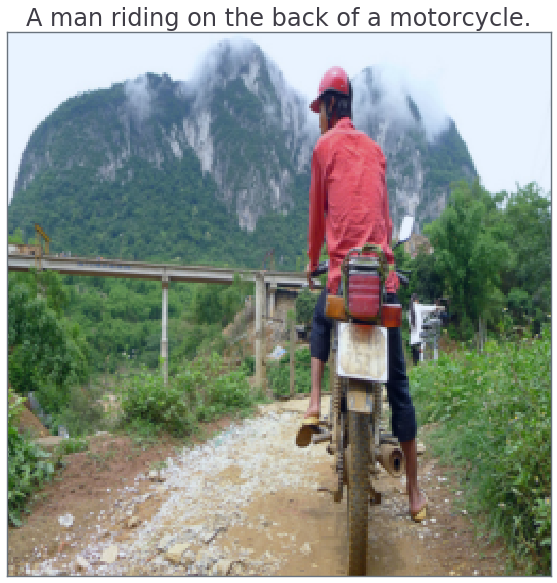

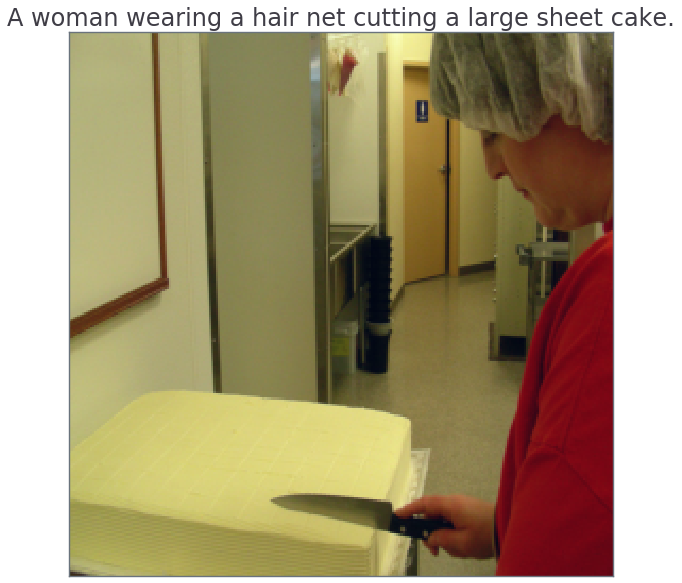

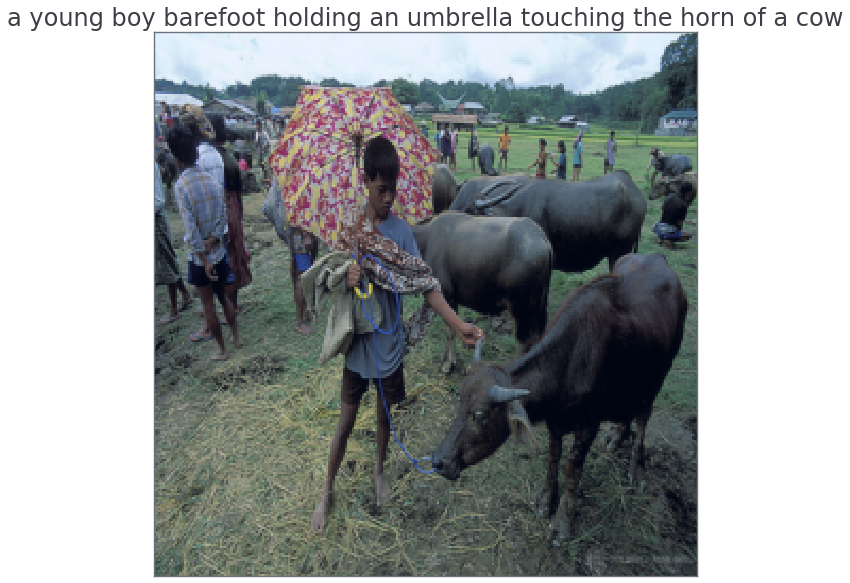

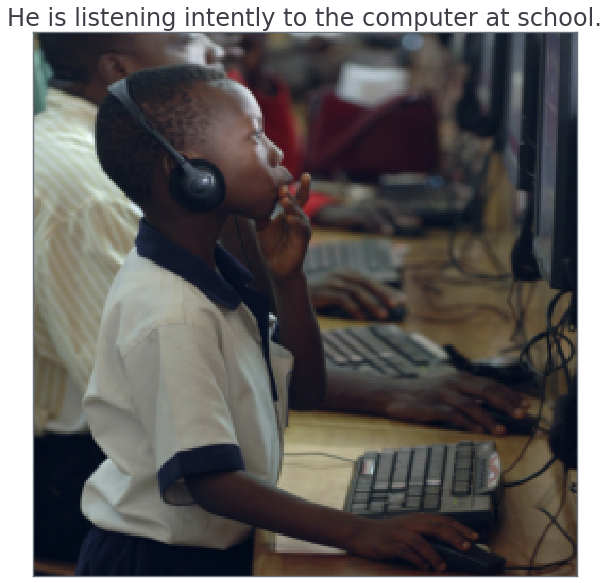

In [5]:
img, captions = next(iter(dataloader['train']))
show_coco(img[:4], captions[:4])

# Extract Features

In [6]:
extractor = Extractor(architecture)

In [13]:
import torch

In [ ]:
for mode in ('val', 'train'):
    features = extract(extractor, dataloader[mode])
    torch.save(features.to('cpu'), DIR_DATA / mode / 'features.pt')